In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()
%config InlineBackend.figure_format = 'svg'
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('/kaggle/input/shipping/shipping.csv')

In [3]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
df.shape

(10999, 12)

In [6]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [7]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [8]:
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [9]:
for x in df.columns:
    print(f'{x} has value counts -- {df[x].nunique()}')

ID has value counts -- 10999
Warehouse_block has value counts -- 5
Mode_of_Shipment has value counts -- 3
Customer_care_calls has value counts -- 6
Customer_rating has value counts -- 5
Cost_of_the_Product has value counts -- 215
Prior_purchases has value counts -- 8
Product_importance has value counts -- 3
Gender has value counts -- 2
Discount_offered has value counts -- 65
Weight_in_gms has value counts -- 4034
Reached.on.Time_Y.N has value counts -- 2


In [10]:
numericals_discretes= []

for x in df.columns:
    if df[x].dtypes != 'O' and df[x].nunique() <= 10:
        numericals_discretes.append(x)

In [11]:
numericals_discretes

['Customer_care_calls',
 'Customer_rating',
 'Prior_purchases',
 'Reached.on.Time_Y.N']

In [12]:
numericals_cont = []

for x in df.columns:
    if df[x].dtypes != 'O' and df[x].nunique() > 10:
        numericals_cont.append(x)

In [13]:
numericals_cont

['ID', 'Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']

In [14]:
categories = []
for x in df.columns:
    if df[x].dtypes == 'O' :
        categories.append(x)

In [15]:
categories

['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

In [16]:
df.drop('ID', axis=1, inplace=True)

In [17]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [18]:
for x in df.select_dtypes(include='O'):
    print(df[x].value_counts())

Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64
Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64
Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64
Gender
F    5545
M    5454
Name: count, dtype: int64


In [19]:
# Map 'Gender' from categorical ('F', 'M') to numerical (0, 1)
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})
print(df['Gender'].head())

0    0
1    1
2    1
3    1
4    0
Name: Gender, dtype: int64


In [20]:
# Map 'Mode_of_Shipment' from categorical to numerical values
# Assuming a hierarchy where Flight is preferred over Ship, and Ship over Road
df['Mode_of_Shipment'] = df['Mode_of_Shipment'].map({'Flight': 2, 'Ship': 1, 'Road': 0})
print(df['Mode_of_Shipment'].head())


0    2
1    2
2    2
3    2
4    2
Name: Mode_of_Shipment, dtype: int64


In [21]:
df['Warehouse_block'] = df['Warehouse_block'].map({
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'F': 4
})
print(df['Warehouse_block'].head())

0    3
1    4
2    0
3    1
4    2
Name: Warehouse_block, dtype: int64


In [22]:
df['Product_importance'] = df['Product_importance'].map({
    'low': 0,
    'medium': 1,
    'high': 2
})
print(df['Product_importance'].head())

0    0
1    0
2    0
3    1
4    1
Name: Product_importance, dtype: int64


In [23]:
df.dtypes

Warehouse_block        int64
Mode_of_Shipment       int64
Customer_care_calls    int64
Customer_rating        int64
Cost_of_the_Product    int64
Prior_purchases        int64
Product_importance     int64
Gender                 int64
Discount_offered       int64
Weight_in_gms          int64
Reached.on.Time_Y.N    int64
dtype: object

In [24]:
df.describe()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,2.333394,1.001546,4.054459,2.990545,210.196836,3.567597,0.604600,0.495863,13.373216,3634.016729,0.596691
std,1.490726,0.567099,1.141490,1.413603,48.063272,1.522860,0.641464,0.500006,16.205527,1635.377251,0.490584
min,0.000000,0.000000,2.000000,1.000000,96.000000,2.000000,0.000000,0.000000,1.000000,1001.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,169.000000,3.000000,0.000000,0.000000,4.000000,1839.500000,0.000000
50%,3.000000,1.000000,4.000000,3.000000,214.000000,3.000000,1.000000,0.000000,7.000000,4149.000000,1.000000
75%,4.000000,1.000000,5.000000,4.000000,251.000000,4.000000,1.000000,1.000000,10.000000,5050.000000,1.000000
max,4.000000,2.000000,7.000000,5.000000,310.000000,10.000000,2.000000,1.000000,65.000000,7846.000000,1.000000


<Axes: xlabel='Weight_in_gms', ylabel='Density'>

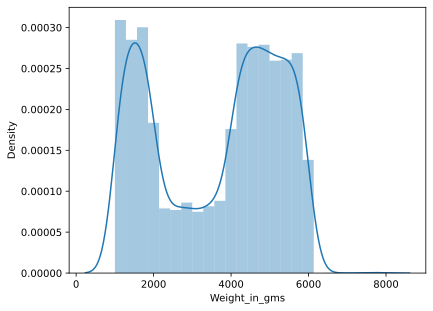

In [25]:
sns.distplot(df['Weight_in_gms'])

<Axes: xlabel='Weight_in_gms'>

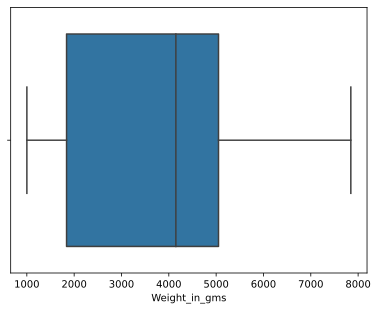

In [26]:
sns.boxplot(x=df['Weight_in_gms'],data=df)

<Axes: xlabel='Cost_of_the_Product', ylabel='Density'>

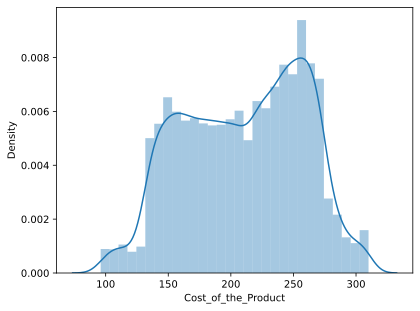

In [27]:
sns.distplot(df['Cost_of_the_Product'])

<Axes: xlabel='Cost_of_the_Product'>

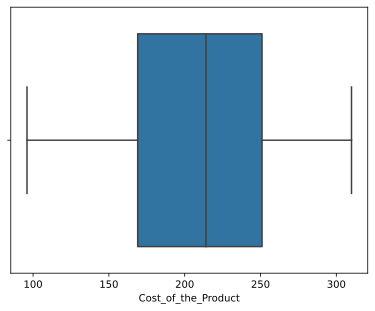

In [28]:
sns.boxplot(x=df['Cost_of_the_Product'],data=df)

Text(0, 0.5, 'Frequency')

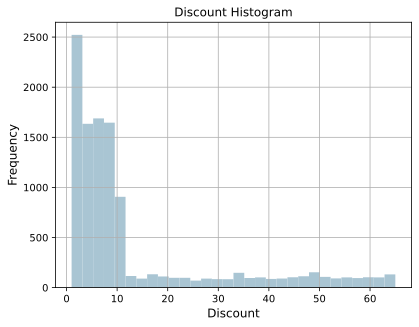

In [29]:
fig, ax = plt.subplots()
df['Discount_offered'].hist(bins=30, color='#A9C5D3')
ax.set_title('Discount Histogram', fontsize=12)
ax.set_xlabel('Discount', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [30]:
df['Discountlog'] = np.log((1+ df['Discount_offered']))

In [31]:
df[['Discount_offered','Discountlog']]

,Discount_offered,Discountlog
0,44,3.806662
1,59,4.094345
2,48,3.891820
3,10,2.397895
4,46,3.850148
...,...,...
10994,1,0.693147
10995,6,1.945910
10996,4,1.609438
10997,2,1.098612


Text(0, 0.5, 'Frequency')

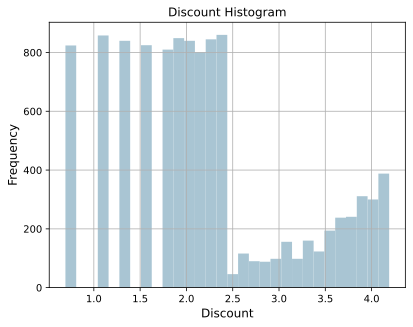

In [32]:
fig, ax = plt.subplots()
df['Discountlog'].hist(bins=30, color='#A9C5D3')
ax.set_title('Discount Histogram', fontsize=12)
ax.set_xlabel('Discount', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [33]:
import scipy.stats as spstats

In [34]:
cost = np.array(df['Cost_of_the_Product'])
cost_clean = cost[~np.isnan(cost)]
l, opt_lambda = spstats.boxcox(cost_clean)
print('Optimal lambda value:', opt_lambda)

Optimal lambda value: 1.1650214124575982


In [35]:
df['Cost_lambda_0'] = spstats.boxcox((1+df['Cost_of_the_Product']), 
                                                         lmbda=0)
df['Cost_lambda_opt'] = spstats.boxcox(df['Cost_of_the_Product'], 
                                                           lmbda=opt_lambda)

Text(24, 450, '$\\mu$=437.48')

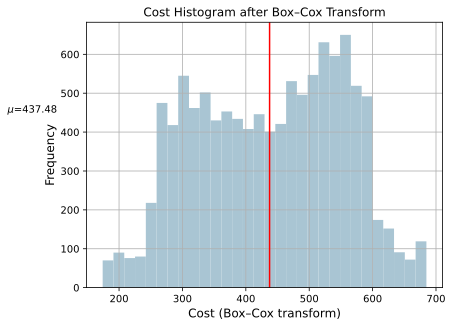

In [36]:
income_boxcox_mean = np.round(np.mean(df['Cost_lambda_opt']), 2)

fig, ax = plt.subplots()
df['Cost_lambda_opt'].hist(bins=30, color='#A9C5D3')
plt.axvline(income_boxcox_mean, color='r')
ax.set_title('Cost Histogram after Box–Cox Transform', fontsize=12)
ax.set_xlabel('Cost (Box–Cox transform)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(24, 450, r'$\mu$='+str(income_boxcox_mean), fontsize=10)